# 7 номер

In [1]:
!pip install gekko
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from math import cos

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  5
   Intermediates:  0
   Connections  :  0
   Equations    :  4
   Residuals    :  4
 
 Number of state variables:    700
 Number of total equations: -  600
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         

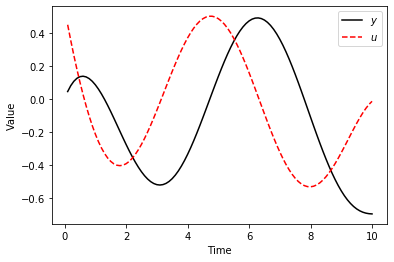

In [2]:
# Задача решена с помощью пакета GEKKO
# Численным методом был найден минимум функционала, равный 7.626451
# пункт А)
# Инициализируем модель
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0,10,nt)

# Задаём переменные
y = m.Var(value=0) # y(0)= 0 по условию в начальной точке
z = m.Var(value=5)
u = m.Var(value=0)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() ==  (y - m.cos(t)) ** 2 + u**2 )
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=True)

# Рисуем получившееся решение

plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  5
   Intermediates:  0
   Connections  :  0
   Equations    :  4
   Residuals    :  4
 
 Number of state variables:    700
 Number of total equations: -  600
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         

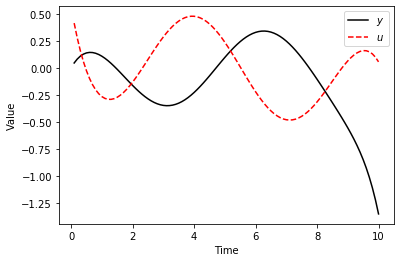

In [4]:
# пункт Б)
# Численным методом был найден минимум функционала, равный 7.9230744
# Инициализируем модель
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0,10,nt)

# Задаём переменные
y = m.Var(value=0) # y(0)= 0 по условию в начальной точке
z = m.Var(value=5)
u = m.Var(value=0)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u + y)
m.Equation(t.dt() == 1)
m.Equation(z.dt() ==  (y - m.cos(t)) ** 2 + u**2 )
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=True)

# Рисуем получившееся решение
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()